# Experiments on Sequential and Optim

In [16]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [17]:
from pyldl.activations import Sigmoid, Tanh
from pyldl.encapsulations import Sequential
from pyldl.losses import MSELoss
from pyldl.modules import Linear
from pyldl.optimizers import SGD
from pyldl.utils import gen_arti, plot_data, plot_frontiere

In [18]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

## Regression

In [19]:
np.random.seed(0)

In [20]:
X, y = make_regression(n_samples=1000, n_features=1, noise=1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
in_features = X_train.shape[1]
out_features = 1

network = Sequential(Linear(in_features, out_features))
loss = MSELoss()

In [22]:
losses = SGD(network, loss, X_train, y_train, batch_size=X_train.shape[0], gradient_step=1e-4, n_iter=500)

100%|██████████| 500/500 [00:00<00:00, 25571.28it/s]


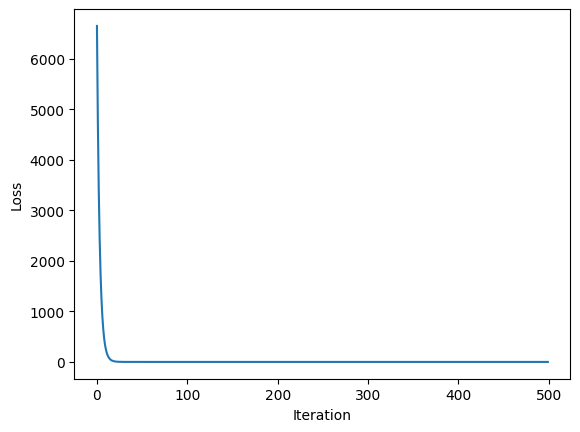

In [23]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

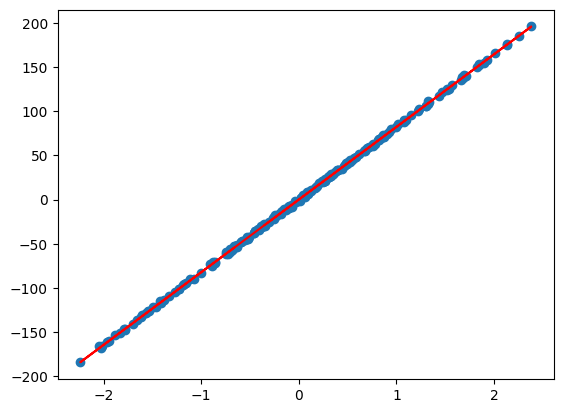

In [24]:
yhat = network.forward(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, yhat, color="red")
plt.show()

## Binary Classification

In [25]:
np.random.seed(0)

In [26]:
X, y = gen_arti(sigma=0.1, nbex=5000, data_type=1, epsilon=0.02)
y = np.where(y == -1, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
network = Sequential(Linear(X_train.shape[1], 8), Tanh(), Linear(8, 1), Sigmoid())
loss = MSELoss()

In [28]:
losses = SGD(network, loss, X_train, y_train, batch_size=X_train.shape[0], gradient_step=1e-3, n_iter=1000)

100%|██████████| 1000/1000 [00:01<00:00, 909.14it/s]


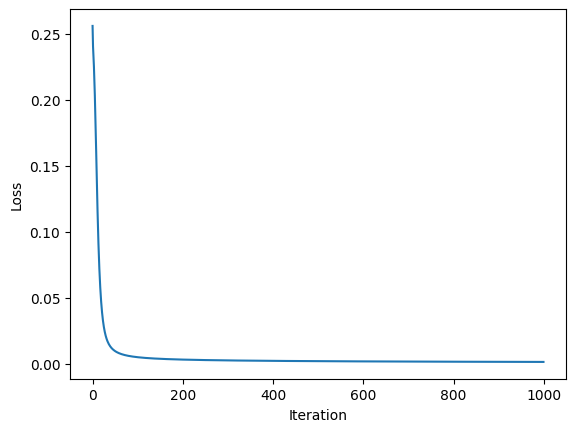

In [29]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [30]:
def predict(X):
    z = network(X)
    return np.where(z > 0.5, 1, 0)

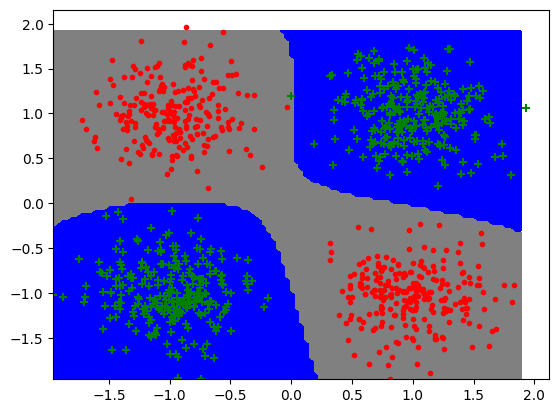

In [31]:
plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test)

In [32]:
def accuracy_score(y, yhat):
    return np.mean(y == yhat)

print(f"Accuracy: {accuracy_score(y_test, predict(X_test))*100:.2f}%")

Accuracy: 99.90%
